In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/'\
'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [202]:
# VIZ 1
# creating a variable containing values for a dataframe only including data where the state is Utah
utah = covid_df[covid_df.Province_State == 'Utah']

# selecting all of the date columns
date_cols = [col for col in covid_df.columns if '/' in col]

#creating a table that has dates as the columns, counties as the rows
utah_dates = utah[date_cols]
# making the county names the index
utah_dates.index = utah["Admin2"].values

# transposing the utah dataframe so that the counties are columns and the dates are rows
# now all the datapoints are cases per day per county
utah_counties = utah[date_cols].T

# converting the dates from strings to readable date format
utah_counties.index = pd.to_datetime(utah_counties.index, format='%m/%d/%y')

# changing the column names to the county names for readability
utah_counties.columns = utah["Admin2"].values
# previewing the table, now ready to work with and plot
utah_counties

,Bear River,Beaver,Box Elder,Cache,Carbon,Central Utah,Daggett,Davis,Duchesne,Emery,...,Tooele,TriCounty,Uintah,Unassigned,Utah,Wasatch,Washington,Wayne,Weber,Weber-Morgan
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,58131,0,0,0,0,22937,0,119821,0,0,...,25044,14944,0,4834,226109,12214,0,0,0,89421
2023-03-06,58131,0,0,0,0,22937,0,119821,0,0,...,25044,14944,0,4834,226109,12214,0,0,0,89421
2023-03-07,58131,0,0,0,0,22937,0,119821,0,0,...,25044,14944,0,4834,226109,12214,0,0,0,89421
2023-03-08,58131,0,0,0,0,22937,0,119821,0,0,...,25044,14944,0,4834,226109,12214,0,0,0,89421


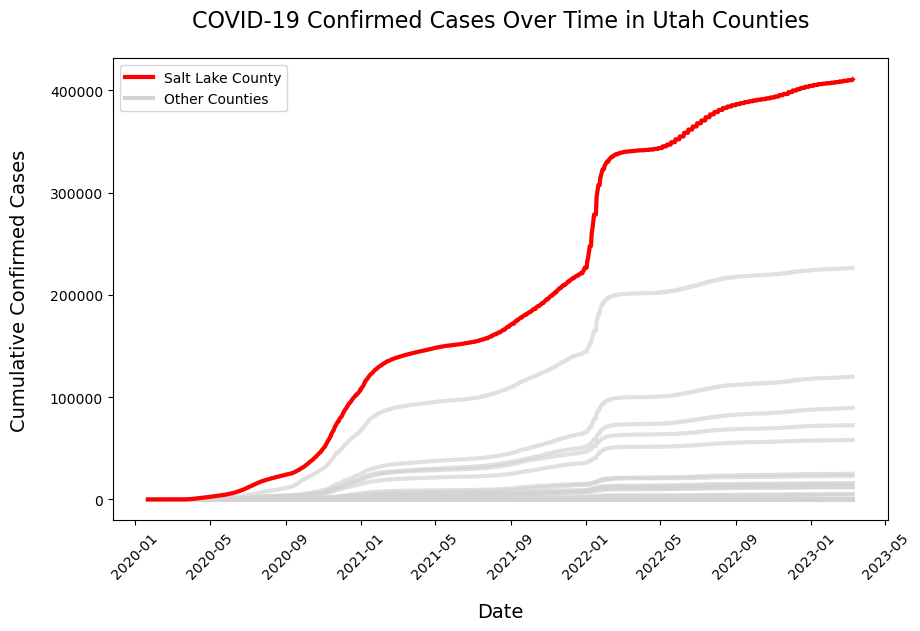

In [257]:
# creating a variable that holds the county I want to highlight (for scalability)
# choosing to highlight Salt Lake County for this assignment
highlight_county = "Salt Lake"
# making the table 12x8 inches to enlarge
plt.figure(figsize=(10, 6))
# looping through each county and creating a line to represent the cases over time
for county in cases.columns:
    # x value is the index (which is the date), y value is the case numbers in each column
    plt.plot(cases.index, cases[county],
             # light grey so the highlighted county stands out
             color="lightgrey",
             # enlarged the line for readability
             linewidth=3,
             # decreased opacity to decrease cluttered look
             alpha=0.7)

# this is for the one county we are highlighting
plt.plot(cases.index, cases[highlight_county],
         color="red",
         linewidth=3,
         label=f"{highlight_county} County")

# empty plotted point to add to the legend
plt.plot([], [],
         color="lightgrey",
         linewidth=3,
         label="Other Counties")

# Labels and title
plt.title("COVID-19 Confirmed Cases Over Time in Utah Counties", y = 1.05, fontsize=16)
plt.xlabel("Date", labelpad=15, fontsize=14)
plt.ylabel("Cumulative Confirmed Cases", labelpad=15, fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [211]:
# VIZ 2
#now making a dataframe of floridas values
florida = covid_df[covid_df.Province_State == 'Florida']
#creating a table that has dates as the columns, counties as the rows
florida_dates = florida[date_cols]
# making the county names the index
florida_dates.index = florida["Admin2"].values

# finding the most recent date
last_date = date_cols[-1]
print(last_date)

utah_max_value = utah_dates['3/9/23'].max()
utah_max_county = utah_dates['3/9/23'].idxmax()

florida_max_value = florida_dates['3/9/23'].max()
florida_max_county = florida_dates['3/9/23'].idxmax()
print(utah_max_county, utah_max_value)
print(florida_max_county, florida_max_value)

3/9/23
Salt Lake 410508
Miami-Dade 1552197


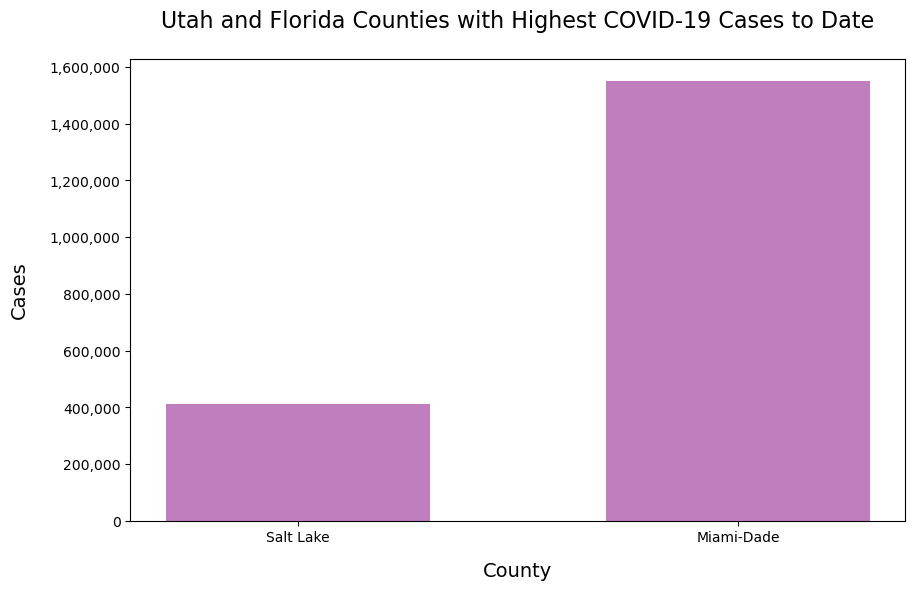

In [325]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar([utah_max_county, florida_max_county],
       [utah_max_value, florida_max_value],
       color='purple',
       width = 0.6,
       alpha=0.5)

# to make the y axis read nicer
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

# adding commas to the y axis numbers
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Utah and Florida Counties with Highest COVID-19 Cases to Date', y=1.05, fontsize=16)
ax.set_xlabel('County', labelpad=12, fontsize=14)
ax.set_ylabel('Cases', labelpad=15, fontsize=14)
plt.show()

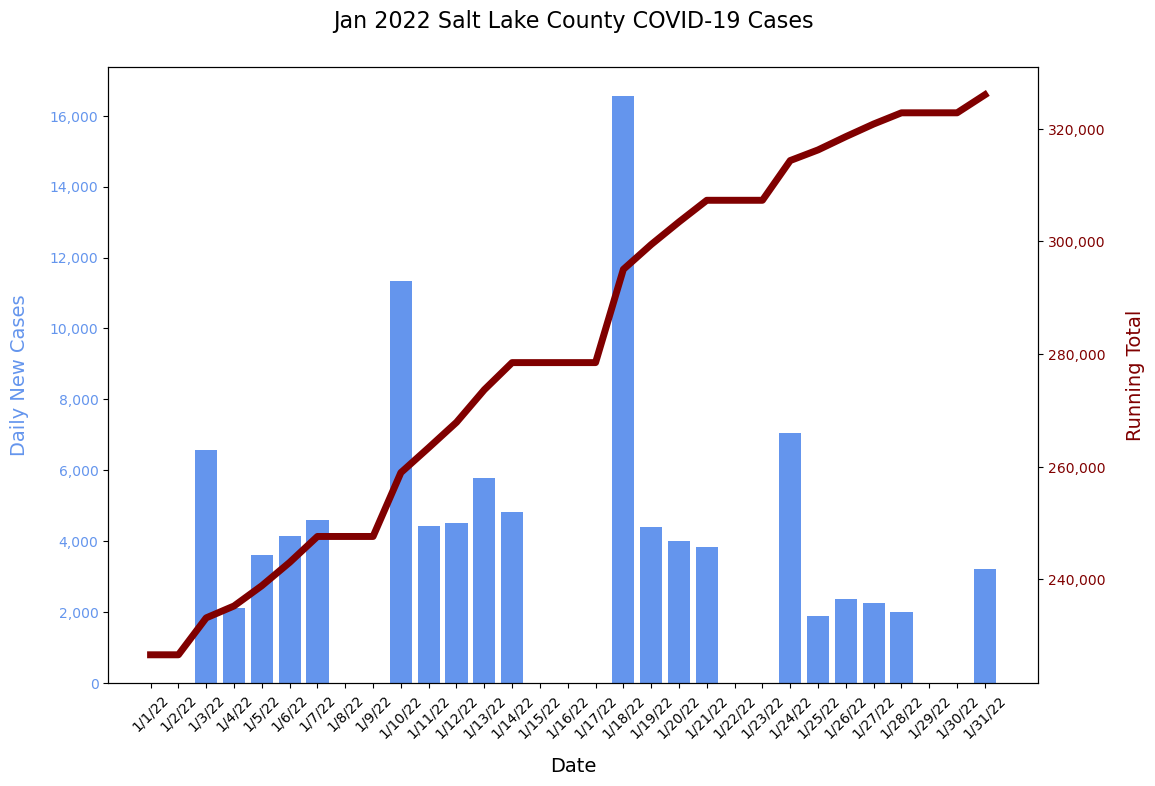

In [308]:
# VIZ 3
# lets do the month of january 2022 in salt lake county for this plot
# first I am getting all the january dates
jan_dates = [col for col in date_cols if col.startswith('1/') and col.endswith('/22')]

# now i am selecting all the cases in january for salt lake county
salt_lake_jan_cases = utah_counties['Salt Lake'][jan_dates]
# creating a series of the daily new cases
salt_lake_daily_new = salt_lake_jan_cases.diff()

# here is the y axis on the left, the daily new cases
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.bar(jan_dates, salt_lake_daily_new, color='cornflowerblue')
ax1.set_ylabel('Daily New Cases', labelpad=15, fontsize=14, color='cornflowerblue')
ax1.set_xlabel('Date', labelpad=12, fontsize=14)
ax1.tick_params(axis='y', labelcolor='cornflowerblue')
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax1.yaxis.set_major_formatter(formatter)

# here is the second y axis, showing the running total
ax2 = ax1.twinx()
ax2.plot(jan_dates, salt_lake_jan_cases, color='maroon', linewidth=5)
ax2.set_ylabel('Running Total', labelpad=15, fontsize=14, color='maroon')
ax2.tick_params(axis='y', labelcolor='maroon')
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax2.yaxis.set_major_formatter(formatter)

#general plot configurations
ax1.set_title('Jan 2022 Salt Lake County COVID-19 Cases', y=1.05, fontsize=16)
ax1.tick_params(axis='x', rotation=45)
plt.show()

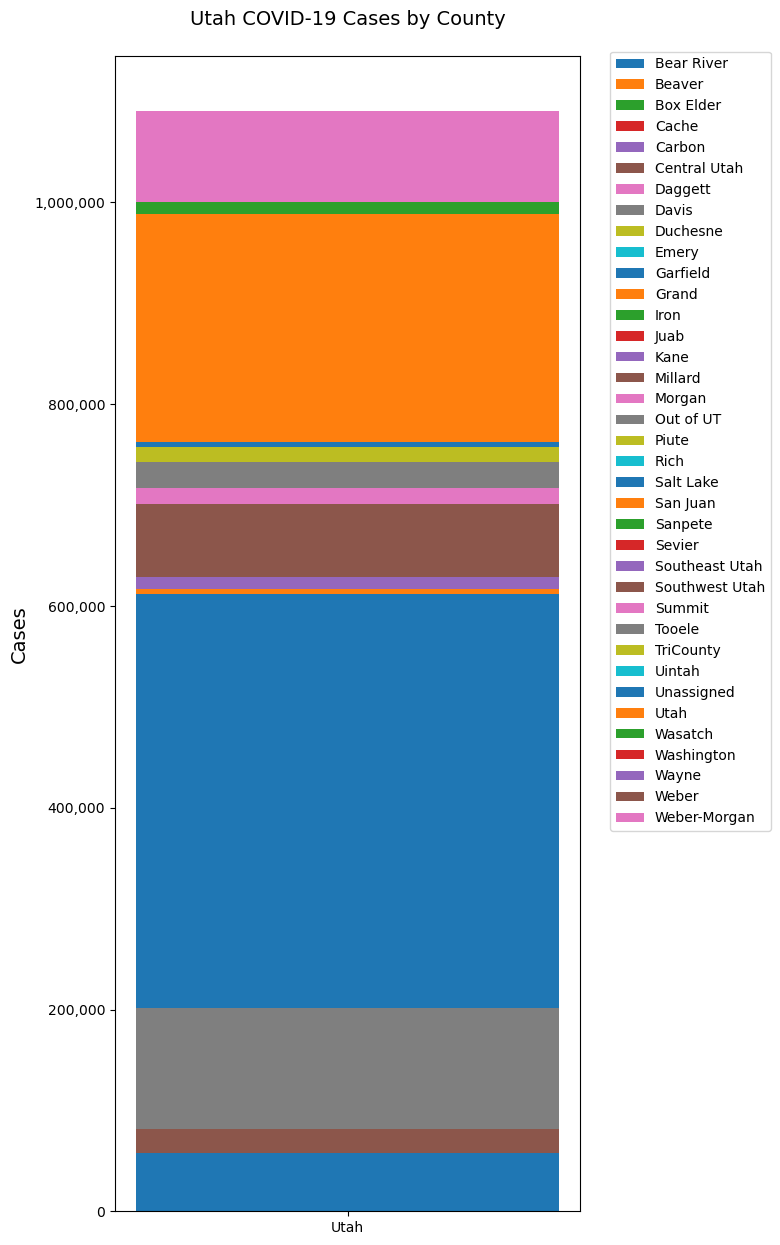

In [358]:
# VIZ 4
# first getting the total for each county
utah_county_totals = utah_counties.loc[last_date]

# now for the plotting
fig, ax = plt.subplots(figsize=(6,15))

# making it start from the bottom
bottom = 0

for county in utah_county_totals.index:
    # one bar for x
    ax.bar("Utah",
           # the height is the given counties total per iteration
           utah_county_totals[county],
           # this makes it stack on the previous segment
           bottom = bottom,
           # the label is the county
           label = county)
    # updating the height of the stack
    bottom += utah_county_totals[county]
    
# making the legend on the outside of the chart
ax.legend(bbox_to_anchor=(1.05, 1.01), loc='upper left')
#general formatting
ax.set_title('Utah COVID-19 Cases by County', fontsize=14, y=1.02)
ax.set_ylabel('Cases', fontsize = 14)
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
plt.show()